Community 0 has a homogeneity of 0.67


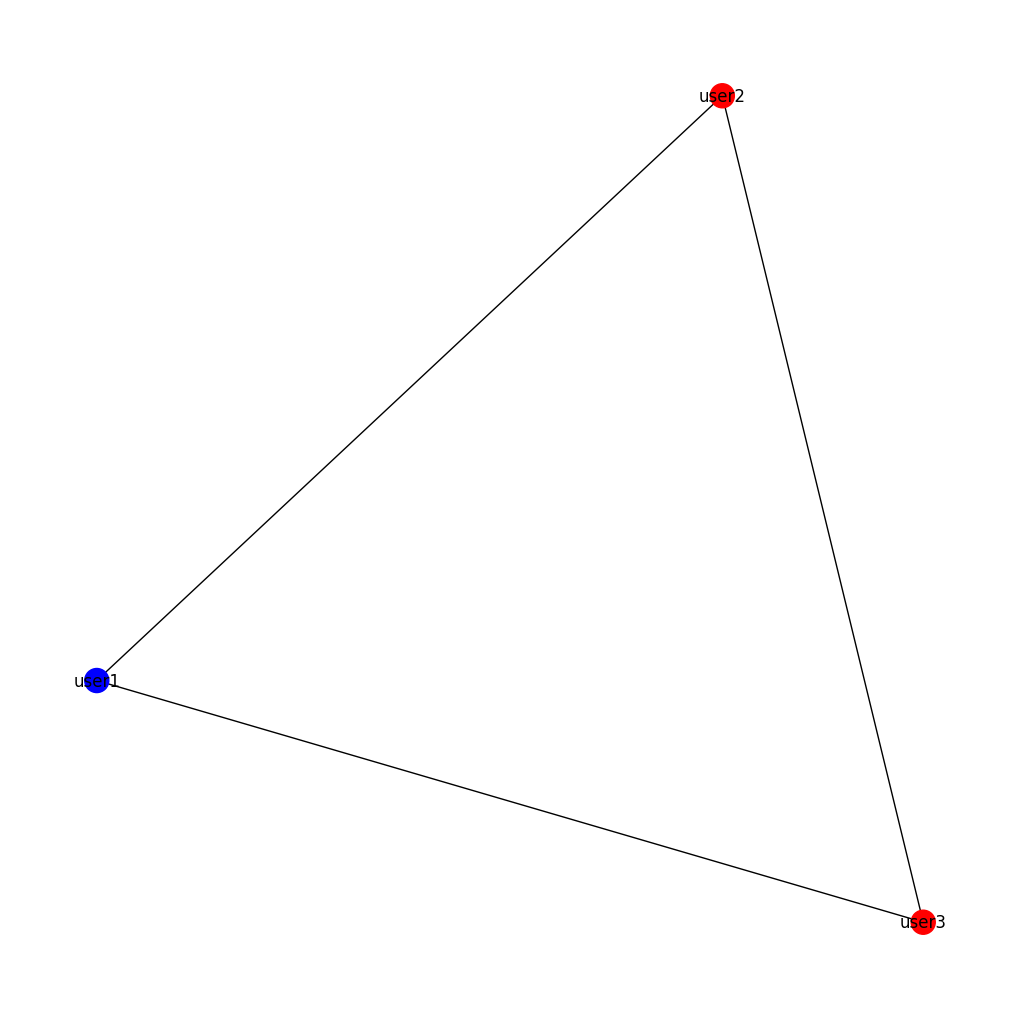

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import defaultdict

# Contoh data tweet
tweets = [
    {"user": "user1", "text": "I love this policy! #politics", "mentions": ["user2"], "retweets": ["user3"]},
    {"user": "user2", "text": "This is a terrible idea. #politics", "mentions": ["user1"], "retweets": ["user3"]},
    {"user": "user3", "text": "Neutral comment #politics", "mentions": [], "retweets": ["user1"]},
    # ...
]

# Buat Graf Jaringan
G = nx.Graph()
for tweet in tweets:
    user = tweet["user"]
    mentions = tweet["mentions"]
    retweets = tweet["retweets"]
    G.add_node(user)
    for mentioned_user in mentions + retweets:
        G.add_edge(user, mentioned_user)

# Analisis Komunitas
communities = list(nx.community.louvain_communities(G))

# Fungsi untuk klasifikasi sentimen
def classify_sentiment(text):
    analysis = TextBlob(text)
    return "positive" if analysis.sentiment.polarity > 0 else "negative"

# Klasifikasi Sentimen untuk setiap pengguna
user_sentiments = {}
for tweet in tweets:
    user = tweet["user"]
    sentiment = classify_sentiment(tweet["text"])
    user_sentiments[user] = sentiment

# Pemetaan Sentimen ke Komunitas
community_sentiments = defaultdict(list)
for idx, community in enumerate(communities):
    for user in community:
        if user in user_sentiments:
            community_sentiments[idx].append(user_sentiments[user])

# Mengukur Homogenitas Sentimen
for community, sentiments in community_sentiments.items():
    positive_count = sentiments.count("positive")
    negative_count = sentiments.count("negative")
    total = len(sentiments)
    homogeneity = max(positive_count, negative_count) / total if total > 0 else 0
    print(f"Community {community} has a homogeneity of {homogeneity:.2f}")

# Visualisasi Graf Jaringan
color_map = []
for node in G:
    color_map.append('blue' if user_sentiments.get(node) == "positive" else 'red')

plt.figure(figsize=(10, 10))
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()


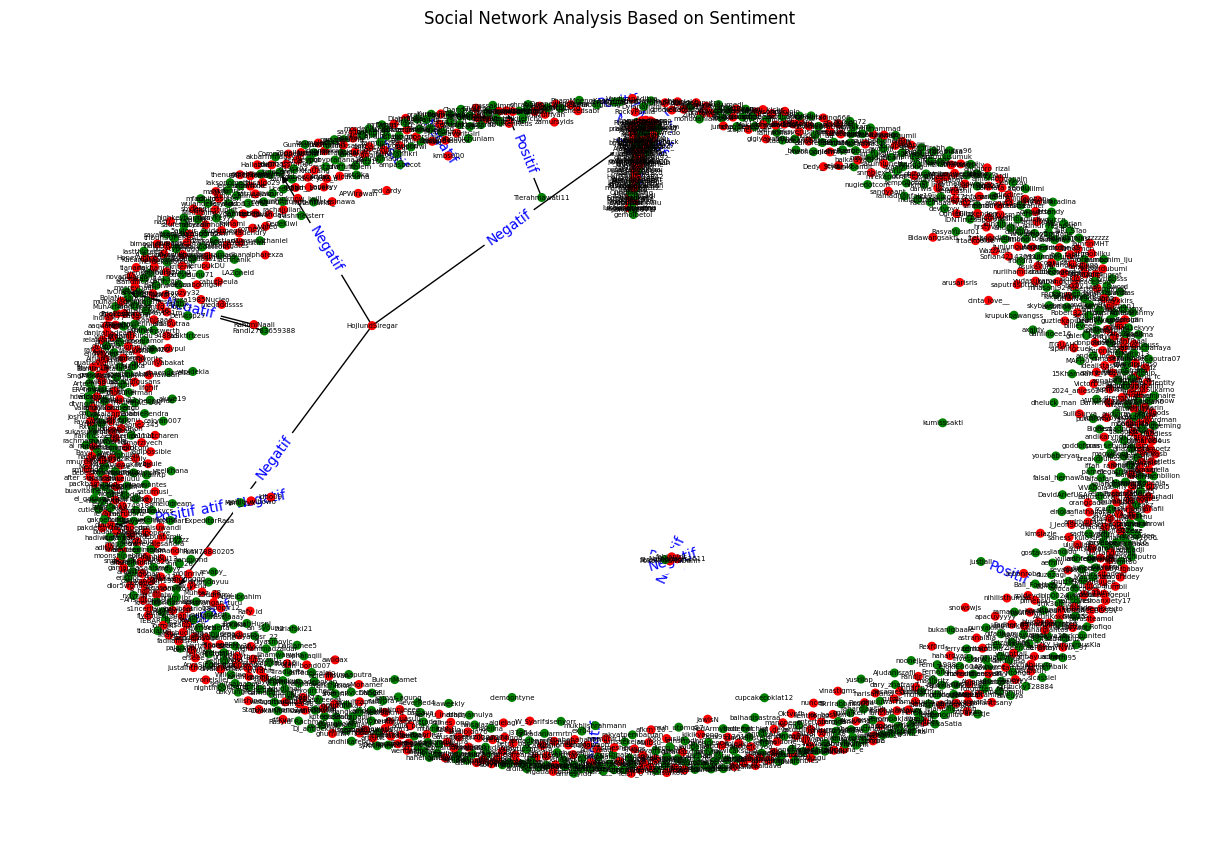

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('./hasil-klasifikasi/klasifikasi_timnas_mainnya_new.csv')

# Create Graph
G = nx.DiGraph()

# Add nodes
for index, row in df.iterrows():
    G.add_node(row['user_id_str'], username=row['username'], label=row['predicted_label'])

# Add edges based on mentions (assuming mentions indicate interactions)
for index, row in df.iterrows():
    mentions = [word for word in row['full_text'].split() if word.startswith('@')]
    for mention in mentions:
        mentioned_user = mention[1:]  # remove '@'
        # Find user_id of mentioned user
        mentioned_user_id = df[df['username'] == mentioned_user]['user_id_str'].values
        if len(mentioned_user_id) > 0:
            G.add_edge(row['user_id_str'], mentioned_user_id[0], sentiment=row['predicted_label'])

# Set node colors based on sentiment
color_map = {'Negatif': 'red', 'Positif': 'green'}
node_colors = [color_map[G.nodes[node]['label']] for node in G.nodes]

# Draw Graph
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'username')
edge_labels = nx.get_edge_attributes(G, 'sentiment')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=30, node_color=node_colors, font_size=5, font_weight='medium')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')
plt.title("Social Network Analysis Based on Sentiment")
plt.show()
